**author**: lukethompson@gmail.com<br>
**date**: 27 Feb 2017<br>
**language**: Python 3.5<br>
**conda enviroment**: emp-py3<br>
**license**: unlicensed<br>

## entropy_plots.ipynb

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_tax_obs = pd.read_csv('~/emp/notebooks/from_priya/tax_entropy_obs.csv', index_col=0)
df_tax_rand = pd.read_csv('~/emp/notebooks/from_priya/tax_entropy_rand.csv', index_col=0)
df_tax_obs.columns = ['mean', 'stderr', 'taxlevel']
df_tax_rand.columns = ['mean', 'stderr', 'taxlevel']

df_branch_obs = pd.read_csv('~/emp/analyses-otus/emp.ent.min-10.c.txt', header=None, sep='\t')
df_branch_rand = pd.read_csv('~/emp/analyses-otus/emp.ent.perm.min-10.c.txt', header=None, sep='\t')
df_branch_obs.columns = ['threshold', 'mean', 'stderr', 'stddev', 'x']
df_branch_rand.columns = ['threshold', 'mean', 'stderr', 'stddev', 'x']

In [3]:
# delete value for permuted branch-length of zero
df_branch_rand.loc[0] = [np.nan, np.nan, np.nan, np.nan, np.nan]

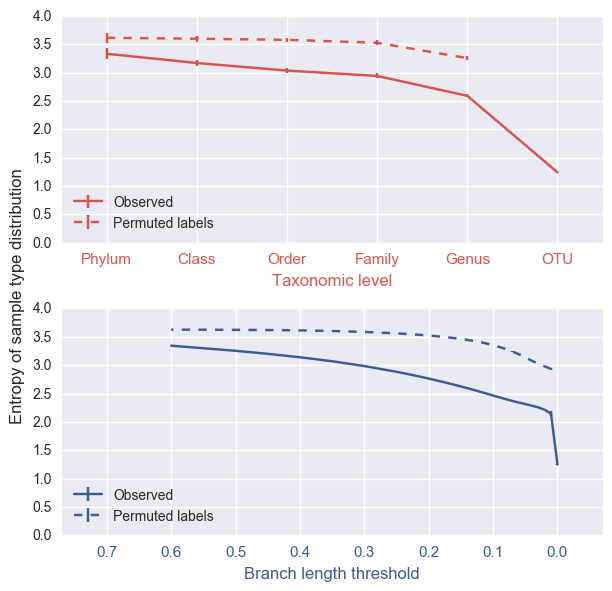

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6,6))

sns.set_style('darkgrid')

ax1c = sns.xkcd_rgb['pale red']
ax2c = sns.xkcd_rgb['denim blue']

# entropy vs. TAXONOMY
ax[0].errorbar(df_tax_obs['taxlevel'], df_tax_obs['mean'], df_tax_obs['stderr'],
            fmt='-o', color=ax1c, mfc='none', label='Observed')
ax[0].errorbar(df_tax_rand['taxlevel'], df_tax_rand['mean'], df_tax_rand['stderr'],
            fmt='--o', color=ax1c, mfc='none', label='Permuted labels')
ax[0].set_ylim([0, 4])
ax[0].set_xlabel('Taxonomic level', fontsize=12, color=ax1c)
ax[0].set_xlim([0.5,6.5])
ax[0].set_xticks([1,2,3,4,5,6])
taxranks=['Phylum', 'Class', 'Order', 'Family', 'Genus', 'OTU']
ax[0].set_xticklabels(taxranks, size=12)
for label in ax[0].get_xticklabels():
    label.set_color(ax1c)
    label.set_size(11)
ax[0].legend(loc='lower left', fontsize=10)

# entropy vs. BRANCH LENGTH THRESHOLD
ax[1].errorbar(df_branch_obs['threshold'], df_branch_obs['mean'], df_branch_obs['stderr'],
            fmt='-o', color=ax2c, mfc='none', label='Observed')
ax[1].errorbar(df_branch_rand['threshold'], df_branch_rand['mean'], df_branch_rand['stderr'],
            fmt='--o', color=ax2c, mfc='none', label='Permuted labels')
ax[1].set_ylim([0, 4])
ax[1].set_xlabel('Branch length threshold', fontsize=12, color=ax2c)
ax[1].set_xlim([0.77, -0.07])
for label in ax[1].get_xticklabels():
    label.set_color(ax2c)
    label.set_size(11)
ax[1].legend(loc='lower left', fontsize=10)

fig.text(0.0, 0.5, 'Entropy of sample type distribution', rotation=90, ha='center', va='center', fontsize=12)   # (median +/- std. error)

plt.tight_layout()
fig.savefig("entropy_taxonomy_branchlength.pdf", bbox_inches='tight')